In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import imutils

## Constant Variable

In [3]:
DATA_DIR = "datasets/"
OUTPUT_DIR = "output/"

## Annotate

In [4]:
def load_images(data_path):
    image_paths = []
    
    for sub_fol in os.listdir(data_path):
        if sub_fol == ".DS_Store": continue
        sub_fol_path = os.path.join(data_path, sub_fol)
        if os.path.isfile(sub_fol_path): continue

        for img in os.listdir(sub_fol_path):
            if img == ".DS_Store": continue
            img_path = os.path.join(sub_fol_path, img)
            image_paths.append(img_path)
    
    return np.array(image_paths)

In [5]:
image_paths = load_images(DATA_DIR)
counts = {}

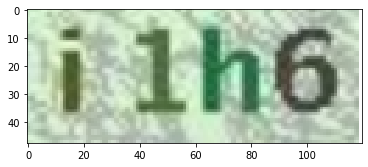

In [8]:
plt.imshow(cv2.imread(image_paths[2]))

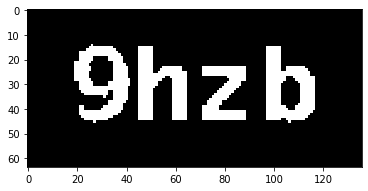

In [10]:
for img_path in image_paths:
    try:
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
#         plt.imshow(thresh, cmap="gray")
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0]
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:4]
        
        
        for c in cnts:
            (x, y, w, h) = cv2.boundingRect(c)
            
            if w > 40:
                roi = gray[y-5:y+5+h, x-5:x + int(w/2)]
                roi_2 = gray[y-5:y+5+h, x + int(w/2):x+5+int(w/2)]
                rois = [roi, roi_2]
            else:
                roi = gray[y-5:y+5+h, x-5:x+5+w]
                rois = [roi]
            
            for roi in rois:    
                cv2.imshow("ROI", imutils.resize(roi, width=28))
                key = cv2.waitKey(0)

                if key == ord("`"):
                    print("[INFO] ignoring character")
                    continue

                key = chr(key).upper()
                dir_path = os.path.join(OUTPUT_DIR, key)

                if not os.path.exists(dir_path):
                    os.mkdir(dir_path)

                count = counts.get(key, 1)
                p = os.path.join(dir_path, "{}.png".format(str(count).zfill(6)))
                cv2.imwrite(p, roi)
                counts[key] = count + 1

    except KeyboardInterrupt:
        print("[INFO] manually leaving script")
        break
    except:
        print("[INFO] skipping image...")